In [4]:
import pandas  as pd

df = pd.read_csv("Wholesale customers data(in).csv")

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### 1. Exploratory Data Analysis: 2pts

In [8]:
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [9]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

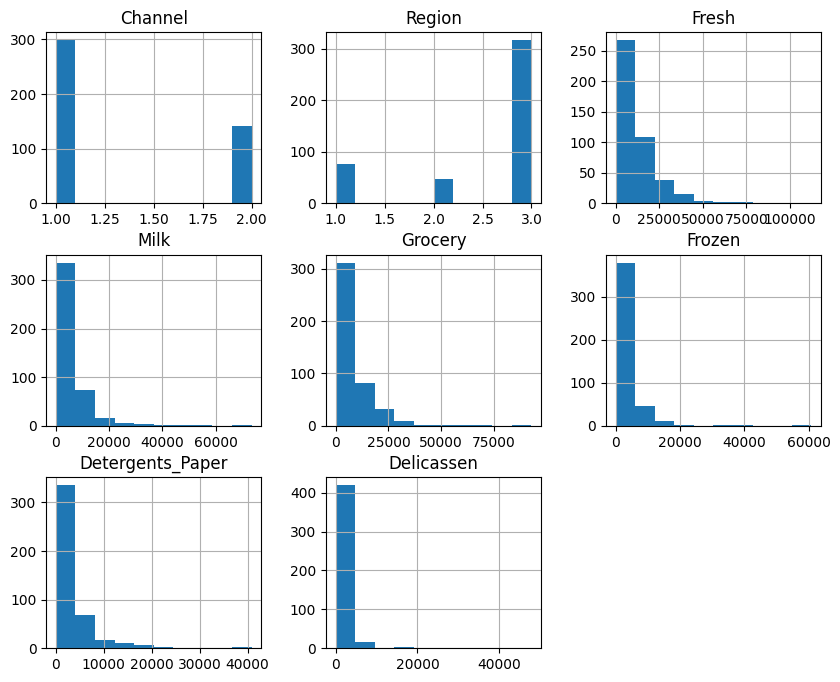

In [12]:
# Univariate Analysis
df.hist(figsize=(10, 8))
plt.show()

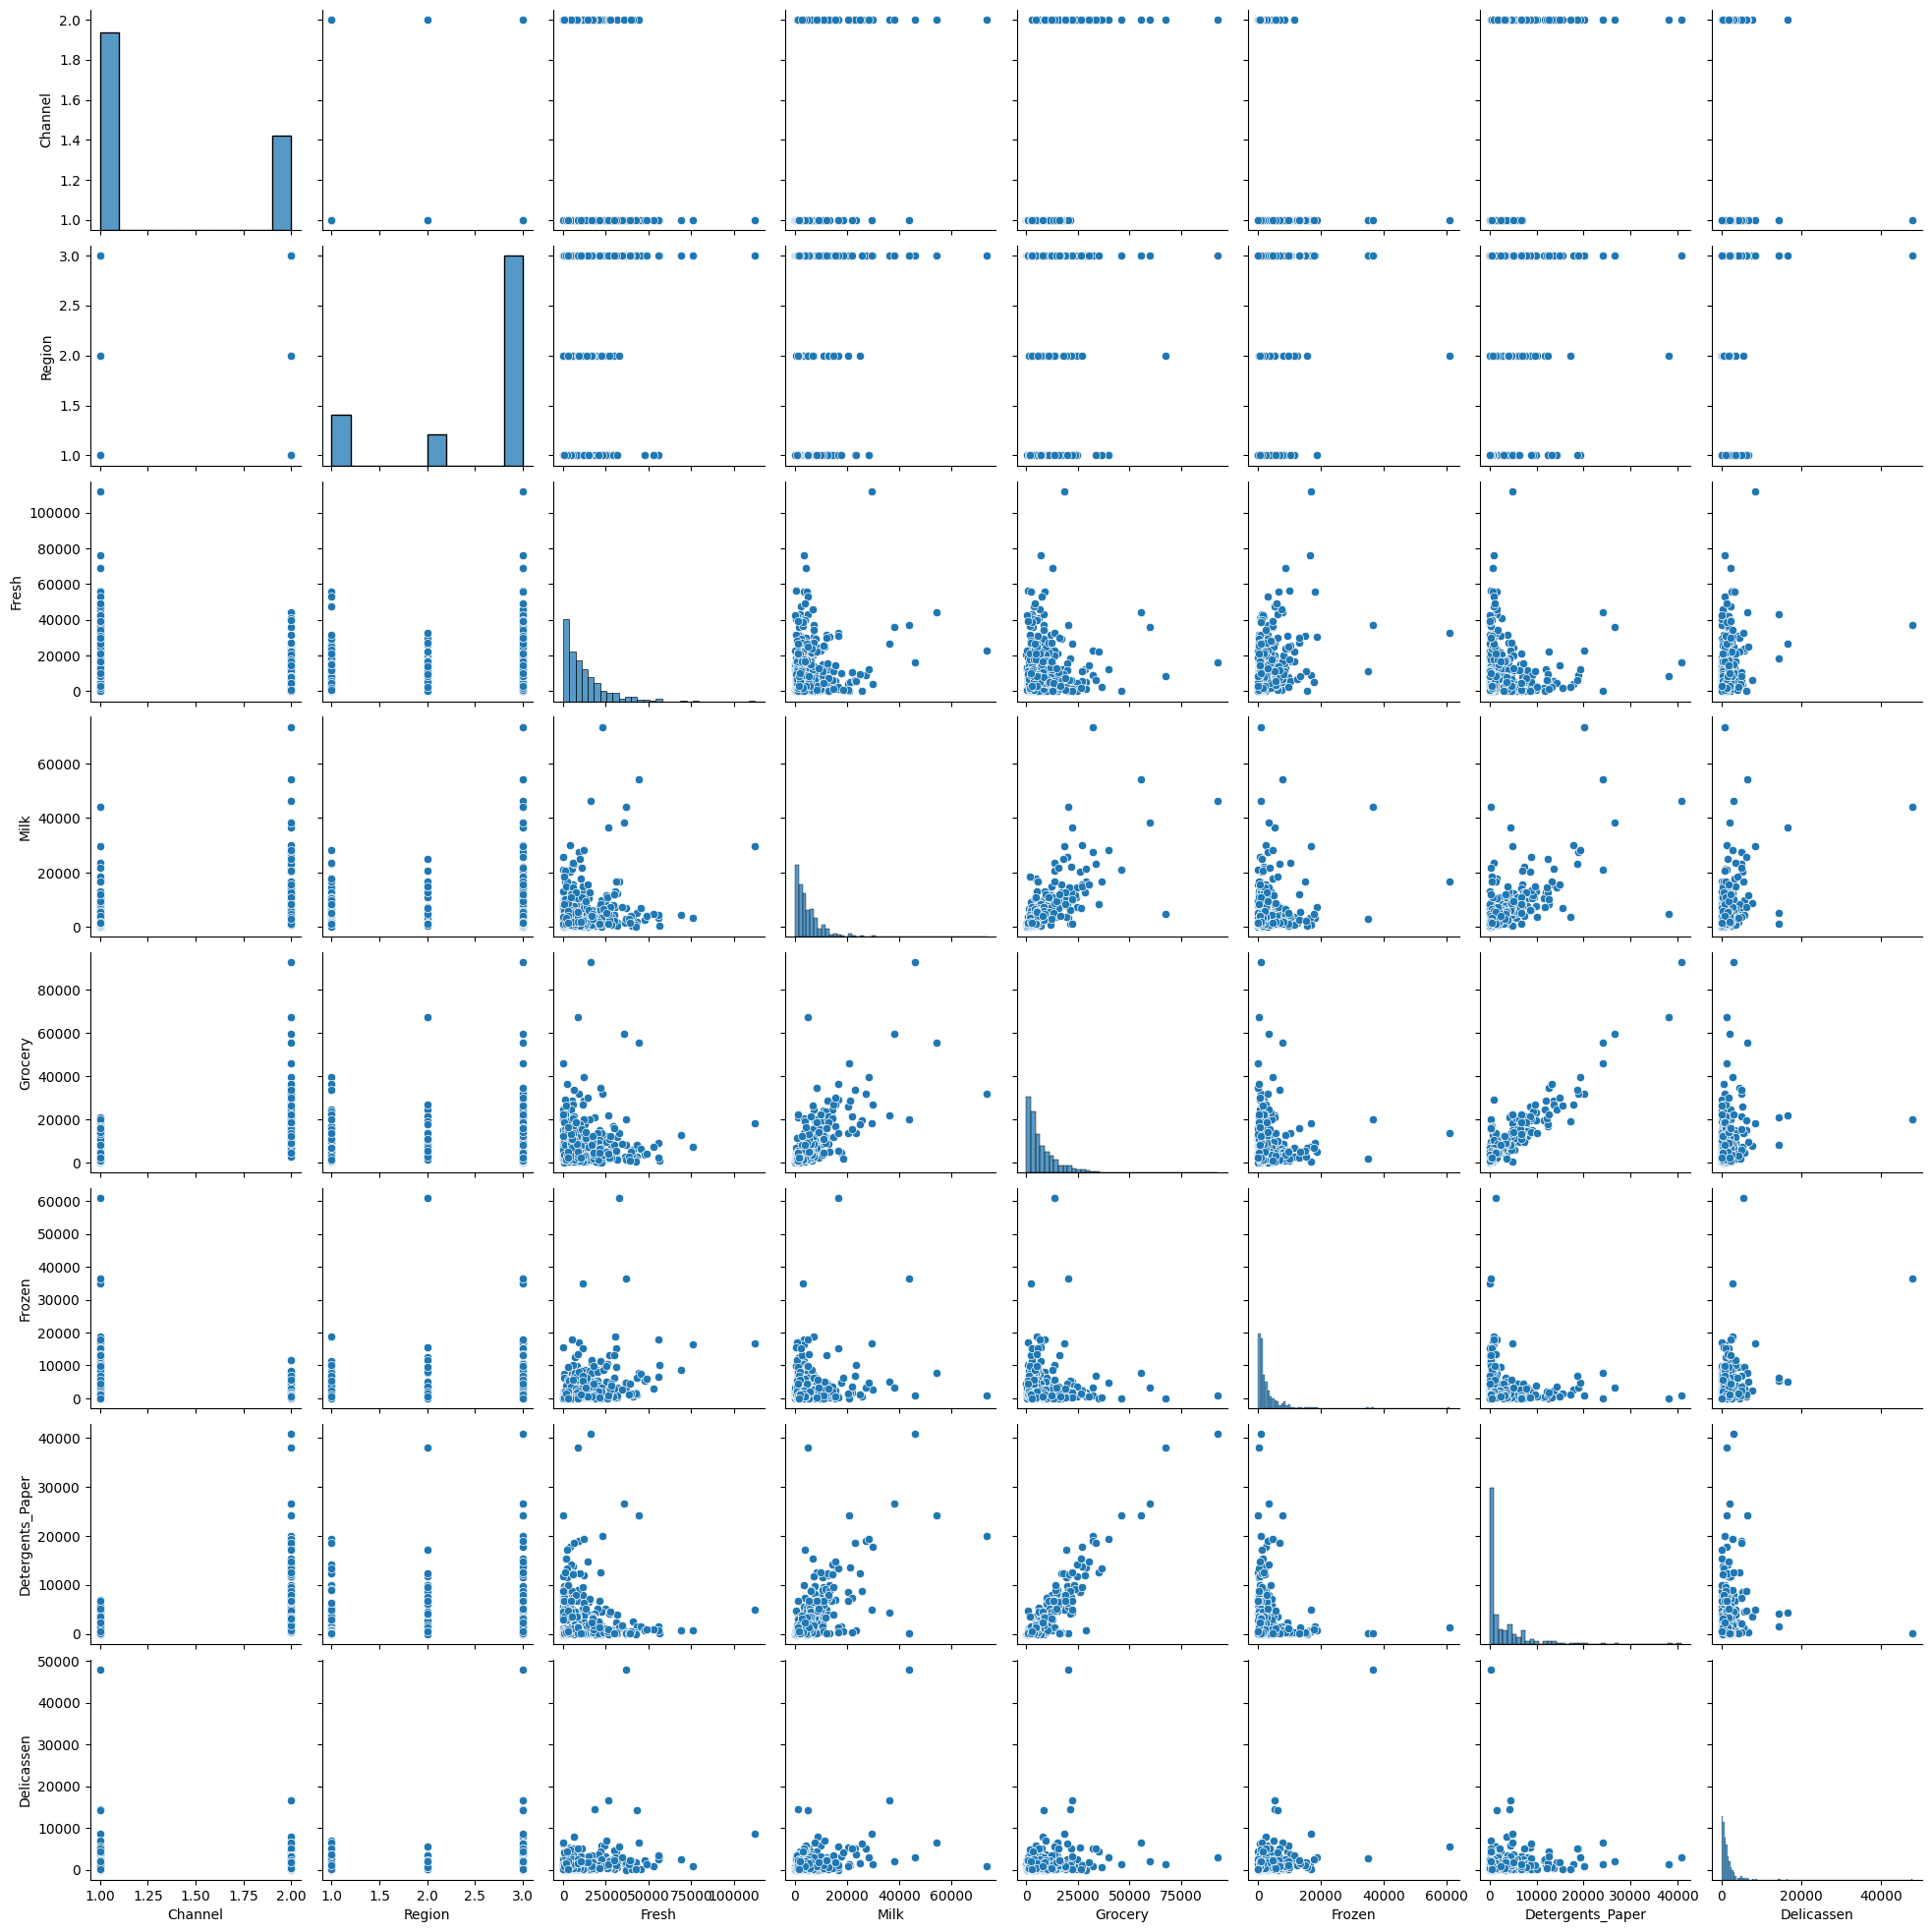

In [13]:
#Bivariet Analysis

sns.pairplot(df)
plt.show()

<Axes: >

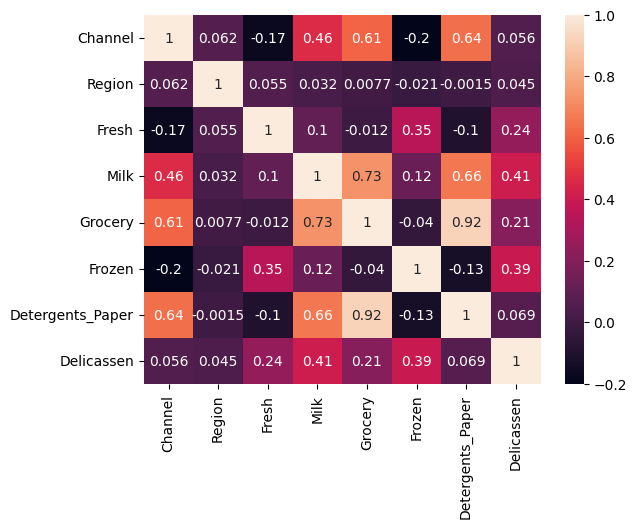

In [14]:
#Corelation Matrix
sns.heatmap(df.corr(), annot=True)

The heatmap here visualizes correlations between different variables. Each cell represents the strength of correlation, ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Notably, there’s a robust positive correlation between Grocery and Detergents Paper.

#### 2. Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler): 

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# MinMaxScaler
min_max_scalar = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scalar.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

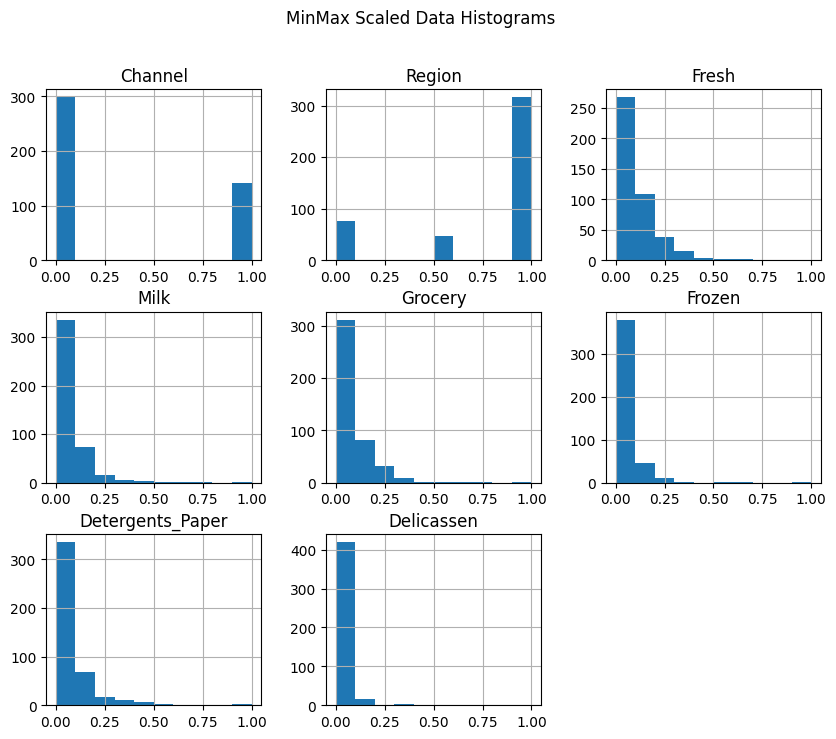

In [16]:
# Histograms/KDE for MinMaxScaler
df_min_max_scaled.hist(figsize=(10, 8))
plt.suptitle('MinMax Scaled Data Histograms')
plt.show()

The histograms of the MinMax scaled data reveal distinct patterns for each variable. Channel and Region show significant concentrations at specific points, indicating categorical distributions. The remaining variables (Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen) exhibit heavily skewed distributions towards lower values, suggesting that most data points are clustered at the lower end of the scale.

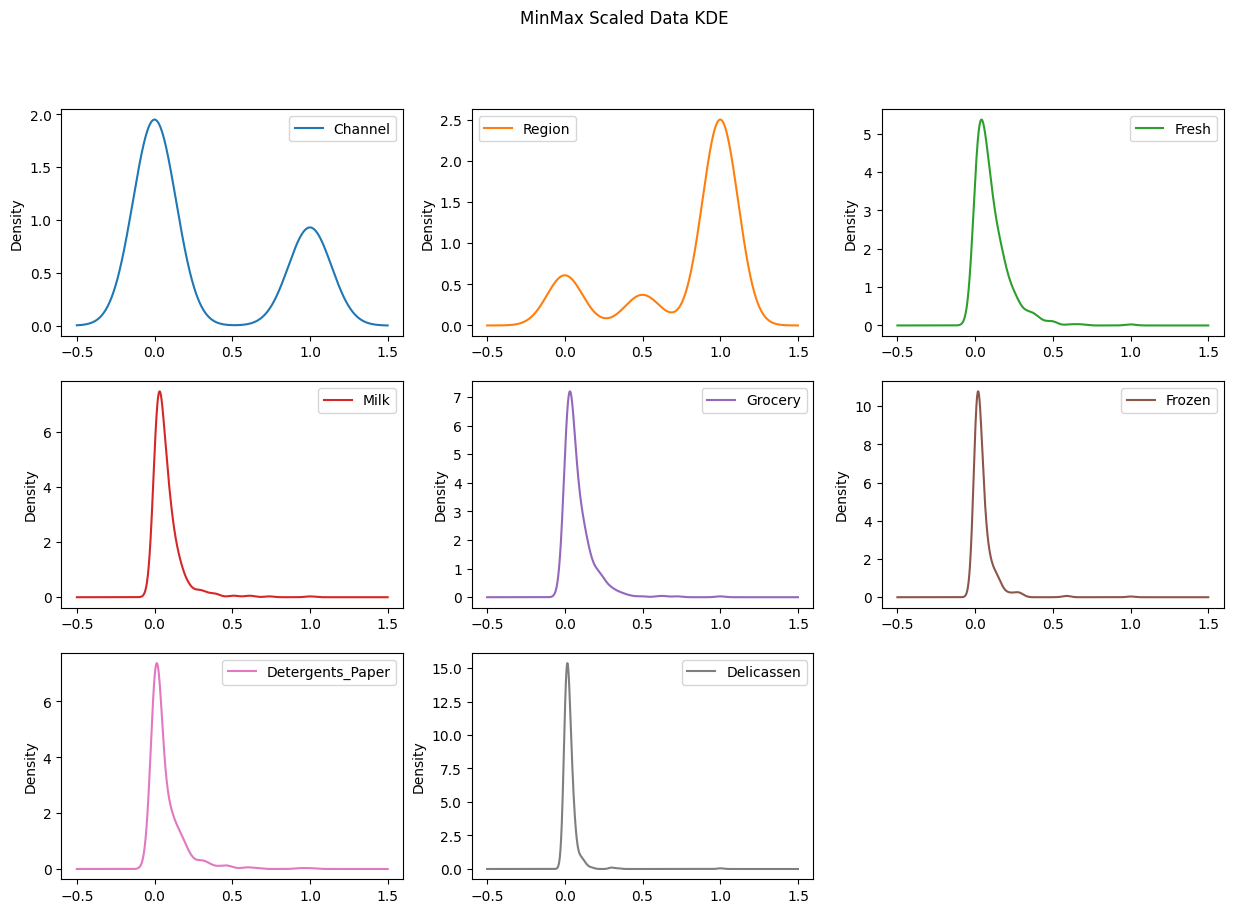

In [17]:
# KDE plots for MinMaxScaler
df_min_max_scaled.plot(kind='kde', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.suptitle('MinMax Scaled Data KDE')
plt.show()

Channel and Region exhibit bimodal and multimodal distributions, respectively, indicating the presence of distinct subgroups within these variables. In contrast, the variables Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen all display highly skewed distributions with significant peaks near zero, suggesting that the majority of the data points for these categories are clustered at lower values.

In [18]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)


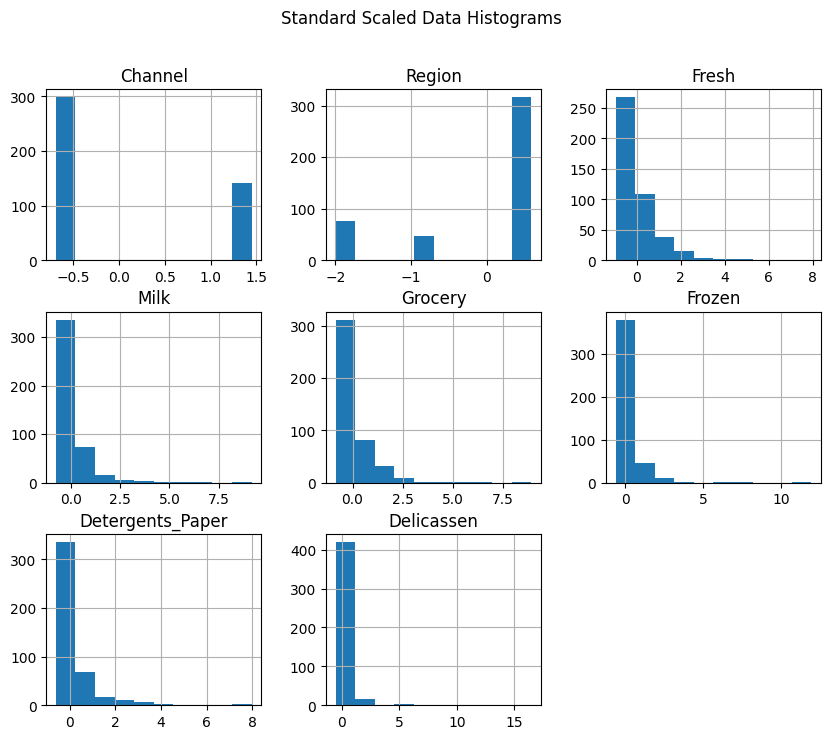

In [19]:
# Histograms/KDE for StandardScaler
df_standard_scaled.hist(figsize=(10, 8))
plt.suptitle('Standard Scaled Data Histograms')
plt.show()

The histograms in the image illustrate the distribution of different features after standard scaling for a dataset from a wholesale distributor. The majority of the features, such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen, exhibit a right-skewed distribution, indicating that most customers have lower spending in these categories, with a few customers having significantly higher expenditures. The Channel and Region features show a more discrete distribution, reflecting categorical data with specific values, likely corresponding to different customer segments or geographical areas.

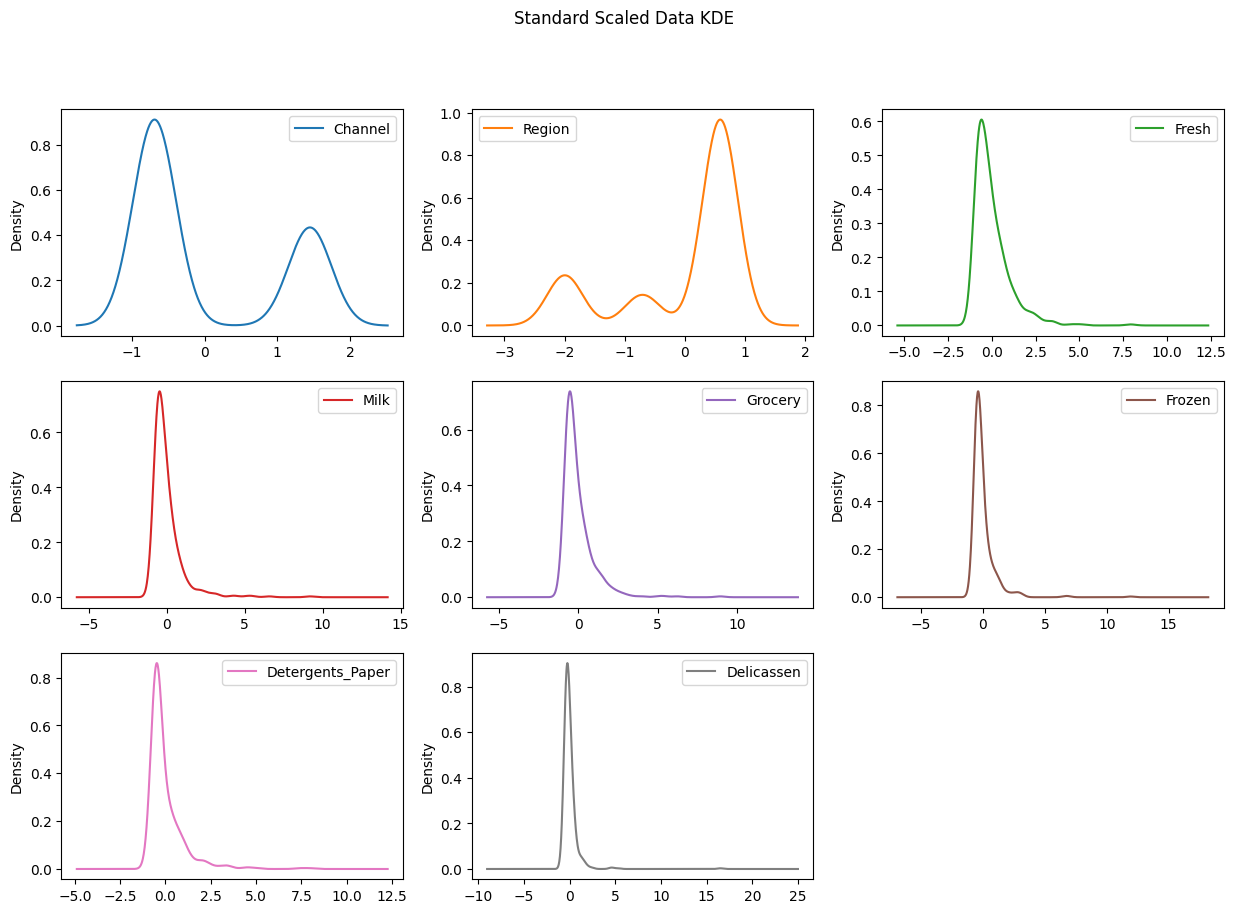

In [20]:
# KDE plots for StandardScaler
df_standard_scaled.plot(kind='kde', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.suptitle('Standard Scaled Data KDE')
plt.show()

#### 3. Implement RFECV and show the plot between the Number of features selected vs Cross-Validation score: 2pts

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Initialize RFECV
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')

# Fit RFECV
rfecv.fit(df.drop(columns=['Channel']), df['Channel'])


RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

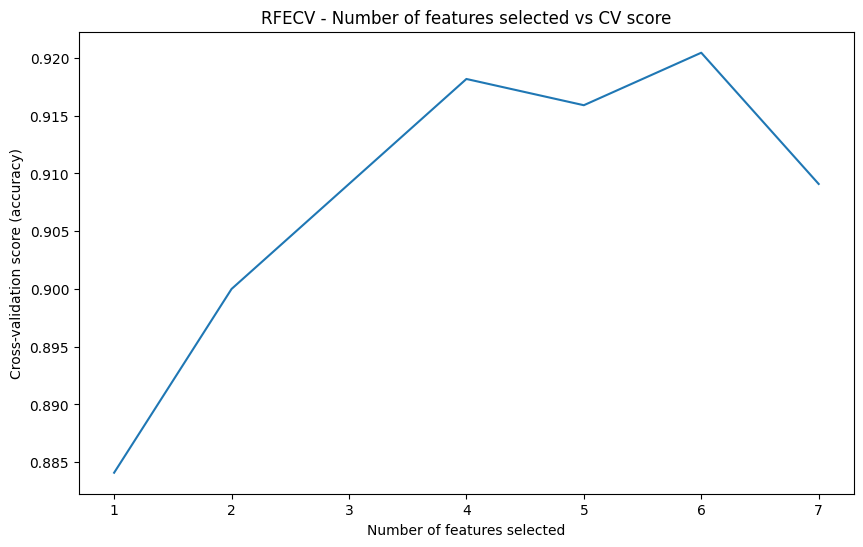

In [22]:
cv_scores = rfecv.cv_results_['mean_test_score']

# Plot the number of features selected vs cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.title("RFECV - Number of features selected vs CV score")
plt.show()

The graph shows that the cross-validation score (accuracy) improves as the number of features selected increases, peaking at four features. After that, the score slightly decreases, indicating that adding more features beyond four does not significantly enhance the model’s performance. This suggests that four features might be the optimal number for this particular model.

In [23]:
# Print the optimal number of features and the selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {df.drop(columns=['Channel']).columns[rfecv.support_]}")

Optimal number of features: 6
Selected features: Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


#### 4. Use elbow plot to determine the optimal number of clusters: 2pts

In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [25]:
# Determine the optimal number of clusters using the Elbow method
distortions = []
K = range(2, 15)

In [26]:

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_standard_scaled)
    distortions.append(sum(np.min(cdist(df_standard_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_standard_scaled.shape[0])


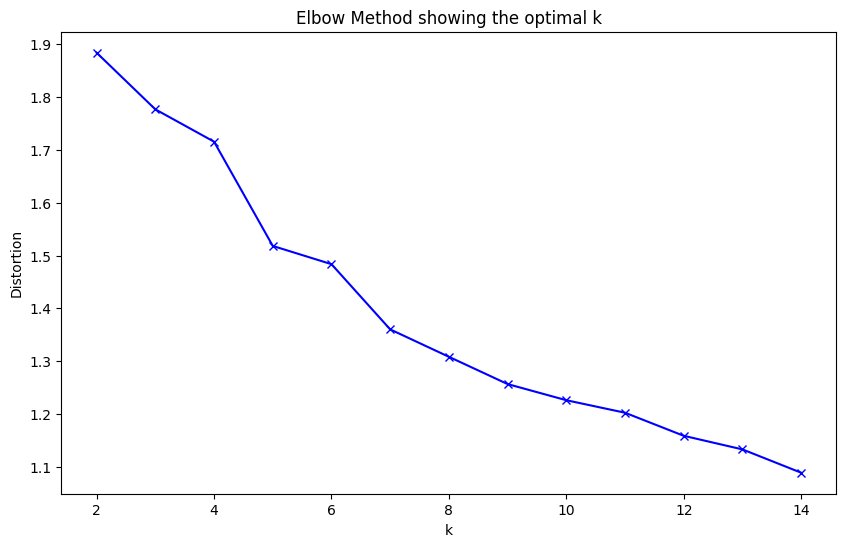

In [38]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()

The distortion decreases as the number of clusters increases, forming a noticeable “elbow” at k = 3.

#### 5. Implement KMeans Clustering and PCA: 4pts

In [40]:
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df_standard_scaled['Cluster'] = kmeans.fit_predict(df_standard_scaled)

In [41]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standard_scaled.drop(columns=['Cluster']))

# Add PCA results to the dataframe
df_standard_scaled['PCA1'] = pca_result[:, 0]
df_standard_scaled['PCA2'] = pca_result[:, 1]

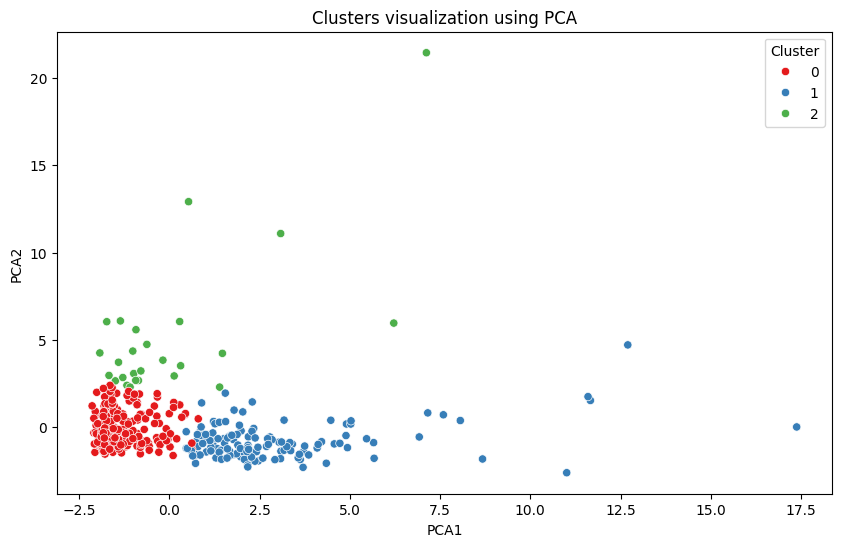

In [42]:
# Visualize the clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_standard_scaled, palette='Set1')
plt.title('Clusters visualization using PCA')
plt.show()

The clusters are plotted along two principal components, PCA1 and PCA2. This visualization helps in identifying patterns and groupings within the data set, with each cluster indicating a different grouping of data points. Here, we can see that the clusters are more towards PCA1 compared to that of PCA2.

#### 6. Calculate variance explained by the first 2 components and by the first 4 components in PCA and visualize the clusters in the data using PCA: 2pts

In [31]:
# Calculate variance explained by the first 2 and 4 components
pca_full = PCA(n_components=4)
pca_full.fit(df_standard_scaled.drop(columns=['Cluster']))

explained_variance = pca_full.explained_variance_ratio_
print(f"Variance explained by first 2 components: {explained_variance[:2].sum()}")
print(f"Variance explained by first 4 components: {explained_variance[:4].sum()}")

Variance explained by first 2 components: 0.7587254684322624
Variance explained by first 4 components: 0.8945027620195711


#### 7. Implement XGBoost Classifier with 5 Fold CV and report the performance metrics(precision, recall, and accuracy): 3pts

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [33]:
# Adjust target values to fit the expected format for XGBClassifier
df['Channel'] = df['Channel'] - 1

# Initialize the classifier
xgb = XGBClassifier()

In [34]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(xgb, df.drop(columns=['Channel']), df['Channel'], cv=5, scoring='accuracy')

# Fit the classifier
xgb.fit(df.drop(columns=['Channel']), df['Channel'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# Predict and evaluate
predictions = xgb.predict(df.drop(columns=['Channel']))
precision = precision_score(df['Channel'], predictions, average='weighted')
recall = recall_score(df['Channel'], predictions, average='weighted')
accuracy = accuracy_score(df['Channel'], predictions)

In [37]:
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Cross-Validation Accuracy: 0.9113636363636364
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


These results we have indicate that the model performs exceptionally well, with perfect precision, recall, and accuracy on the test set. Cross-validation accuracy being slightly lower (91.1%) suggests the model might have slight variations in performance across different subsets of the data, which is normal.

#### 8. Provide observations and reasoning for visualizations and results included.

All the obserations are written down below the diagrams in the respective markdown cells.